In [86]:
import re
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [87]:
train_pattern = " loss = (.*?), acc ="
val_pattern = "validation_loss = (.*?), validation_acc ="
valacc_pattern = ", validation_acc = (\d+\.\d+)"
trainacc_pattern = ", acc = (\d+\.\d+)"

In [107]:
data = pd.DataFrame()
lines=[]

filepath = 'mstcn_output_t5.txt'
with open(filepath) as fp:
   line = fp.readline()
   while line:
       lines.append(line.strip())
       line = fp.readline()
        
data['lines'] = lines

In [108]:
def get_lossValue(pattern, s):
    value = re.search(pattern, s)
    if value:
        return float(value.group(1))
    else: return None

data['train_loss'] = data['lines'].apply(lambda x: get_lossValue(train_pattern, x))
data['val_loss'] = data['lines'].apply(lambda x: get_lossValue(val_pattern, x))
data['val_acc'] = data['lines'].apply(lambda x: get_lossValue(valacc_pattern, x))
data['train_acc'] = data['lines'].apply(lambda x: get_lossValue(trainacc_pattern, x))

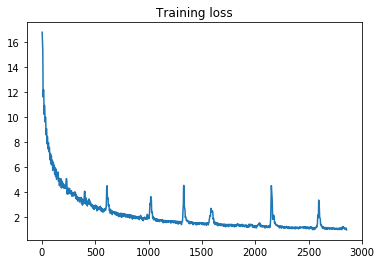

In [109]:
%matplotlib inline
plt.title('Training loss')
plt.plot(data['train_loss'].dropna())
plt.show()

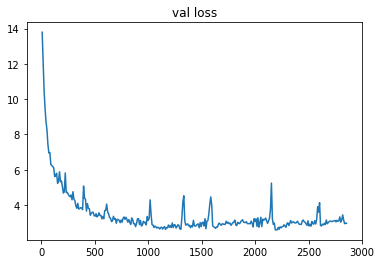

In [110]:
%matplotlib inline
plt.title('val loss')
plt.plot(data['val_loss'].dropna())
plt.show()

In [111]:
val_acc = data['val_acc'].dropna().reset_index(drop=True).tolist()

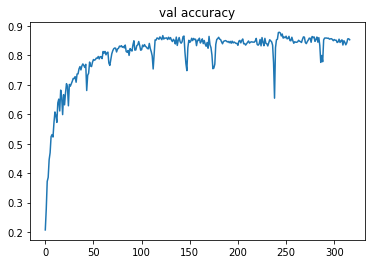

In [112]:
%matplotlib inline
plt.title('val accuracy')
plt.plot(range(len(val_acc)),val_acc)
plt.show()

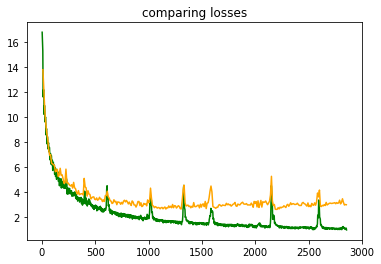

In [113]:
%matplotlib inline
plt.title('comparing losses')
plt.plot(data['train_loss'].dropna(), color="green")
plt.plot(data['val_loss'].dropna(), color="orange")
plt.show()

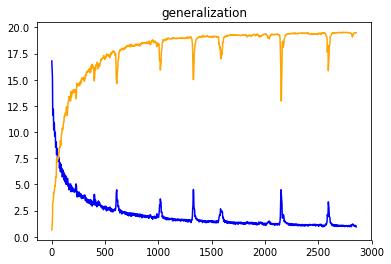

In [114]:
%matplotlib inline
plt.title('generalization')
plt.plot(data['train_loss'].dropna(), color="blue")
plt.plot(data['train_acc'].dropna() * 20, color="orange")
plt.show()

In [115]:
## index for highest val acc
data[data['val_acc'] == data['val_acc'].max()]

,lines,train_loss,val_loss,val_acc,train_acc
2197,"[epoch 244]: train_loss = 0.045463, train_acc ...",NaN,2.591657,0.878395,NaN
